# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [2]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [3]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [8]:
pyber_data_df.describe()

,fare,ride_id,driver_count
count,2375.000000,2.375000e+03,2375.000000
mean,26.753112,4.887270e+12,28.930105
std,12.109465,2.907361e+12,20.666306
min,4.050000,3.218337e+08,1.000000
25%,17.190000,2.381175e+12,11.000000
50%,26.600000,4.748541e+12,23.000000
75%,36.645000,7.461936e+12,45.000000
max,58.550000,9.991538e+12,73.000000


## Deliverable 1: Get a Summary DataFrame 

In [16]:
#  1. Get the total rides for each city type
rides_per_city_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
rides_per_city_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [17]:
# 2. Get the total drivers for each city type
drivers_per_city_type = city_data_df.groupby(["type"]).sum()["driver_count"]
drivers_per_city_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [18]:
#  3. Get the total amount of fares for each city type
sum_fares_by_city_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_city_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [19]:
#  4. Get the average fare per ride for each city type. 
average_fare_per_ride_by_city_type = sum_fares_by_city_type / rides_per_city_type
average_fare_per_ride_by_city_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [81]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver_by_city_type = sum_fares_by_city_type / drivers_per_city_type
average_fare_per_driver_by_city_type.map("${:,.2f}".format) 

type
Rural       $55.49
Suburban    $39.50
Urban       $16.57
dtype: object

In [82]:
average_fare_per_driver_by_city_type

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [28]:
#  6. Create a PyBer summary DataFrame. 
# school_data_complete_df = pd.merge(student_data_df, school_data_df, on=["school_name", "school_name"])

pyber_summary_df = []
pyber_summary_df =[rides_per_city_type,drivers_per_city_type]
pyber_summary_df

[type
 Rural        125
 Suburban     625
 Urban       1625
 Name: ride_id, dtype: int64,
 type
 Rural         78
 Suburban     490
 Urban       2405
 Name: driver_count, dtype: int64]

In [37]:
#pyber_summary_df = []
pyber_summary_df = pd.DataFrame(rides_per_city_type)
pyber_summary_df

,ride_id
type,
Rural,125
Suburban,625
Urban,1625


In [44]:
data ={"Total Rides": rides_per_city_type, "Total Drivers":drivers_per_city_type,
       "Total Fares": sum_fares_by_city_type, "Average Pare per Ride":average_fare_per_ride_by_city_type , 
       "Average Fare per Driver": average_fare_per_driver_by_city_type}
pyber_summary_df= pd.DataFrame(data)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Pare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [46]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Pare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [86]:
#  8. Format the columns.

# district_summary_df["Total Budget"] = district_summary_df["Total Budget"].map("${:,.2f}".format)

data ={"Total Rides": rides_per_city_type.map("{:,}".format), 
       "Total Drivers":drivers_per_city_type.map("{:,}".format),
       "Total Fares": sum_fares_by_city_type.map("${:,.2f}".format), 
       "Average Pare per Ride":average_fare_per_ride_by_city_type.map("${:,.2f}".format) , 
       "Average Fare per Driver": average_fare_per_driver_by_city_type.map("${:,.2f}".format)}
pyber_summary_df= pd.DataFrame(data)
pyber_summary_df

#pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("${:,.2f}".format)

,Total Rides,Total Drivers,Total Fares,Average Pare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [51]:
#pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("${:,.2f}".format)
#pyber_summary_df["Total Rides"]

In [76]:
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("${:,.2f}".format)
pyber_summary_df["Total Rides"]

ValueError: Unknown format code 'f' for object of type 'str'

In [74]:
pyber_summary_df = pd.DataFrame("Total Rides":rides_per_city_type, 
       ["Total Drivers":drivers_per_city_type],
       ["Total Fares": sum_fares_by_city_type], 
       ["Average Pare per Ride":average_fare_per_ride_by_city_type], 
       ["Average Fare per Driver":average_fare_per_driver_by_city_type])

pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("${:,.2f}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("${:,.2f}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Pare per Ride"] = pyber_summary_df["Average Pare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

pyber_summary_df

SyntaxError: invalid syntax (Temp/ipykernel_26640/4225897071.py, line 1)

In [64]:
data ={"Total Rides": rides_per_city_type, 
       "Total Drivers":drivers_per_city_type,
       "Total Fares": sum_fares_by_city_type, 
       "Average Fare per Ride":average_fare_per_ride_by_city_type , 
       "Average Fare per Driver": average_fare_per_driver_by_city_type}
pyber_summary_df= pd.DataFrame(data)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame


In [110]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

#sum_fares_by_city_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_city_type2 = pyber_data_df.groupby(["date"]).sum()["fare"] 
#sum_fares_by_city_type3 = pyber_data_df.groupby(["type"]).sum()["fare"]
#sum_fares_by_city_type3

In [99]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

#sum_fares_by_city_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_city_type2 = pyber_data_df.groupby(["date"]).sum()["fare"]
sum_fares_by_city_type2

date
2019-01-01 00:08:16    37.91
2019-01-01 00:46:46    47.74
2019-01-01 02:07:24    24.07
2019-01-01 03:46:50     7.57
2019-01-01 05:23:21    10.75
                       ...  
2019-05-08 04:20:00    21.99
2019-05-08 04:39:49    18.45
2019-05-08 07:29:01    18.55
2019-05-08 11:38:35    19.77
2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [123]:
sum_fares_by_city_type2 = pyber_data_df.groupby(["date", "type"]).sum()["fare"]
sum_fares_by_city_type2

date                 type    
2019-01-01 00:08:16  Urban       37.91
2019-01-01 00:46:46  Suburban    47.74
2019-01-01 02:07:24  Suburban    24.07
2019-01-01 03:46:50  Urban        7.57
2019-01-01 05:23:21  Urban       10.75
                                 ...  
2019-05-08 04:20:00  Urban       21.99
2019-05-08 04:39:49  Urban       18.45
2019-05-08 07:29:01  Urban       18.55
2019-05-08 11:38:35  Urban       19.77
2019-05-08 13:10:18  Urban       18.04
Name: fare, Length: 2375, dtype: float64

In [118]:
sum_fares_by_city_type2 = pyber_data_df.groupby(["type", "date"]).sum()["fare"]
sum_fares_by_city_type2

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [119]:
sum_fares_by_city_type2 = pyber_data_df.groupby(["type", "date"]).sum()["fare"]
sum_fares_by_city_type2 = sum_fares_by_city_type2.reset_index()
sum_fares_by_city_type2

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [124]:
# USING DOUBLE BRAKETS IN THE FARE OF THE SUM FUNCTION

sum_fares_by_city_type2 = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]
sum_fares_by_city_type2_reset = sum_fares_by_city_type2.reset_index()
sum_fares_by_city_type2_reset

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [ ]:
sum_fares_by_city_type2_reset.loc[sum_fares_by_city_type2_reset["type"]=]

In [131]:
sum_fares_by_city_type2_reset_pivot = sum_fares_by_city_type2_reset.pivot(index="date", columns="type", values="fare")
sum_fares_by_city_type2_reset_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [126]:
#sum_fares_by_city_type2 = pyber_data_df.groupby(["date", "type"]).sum()["fare"]
#sum_fares_by_city_type2 = sum_fares_by_city_type2.reset_index()
#sum_fares_by_city_type2

In [153]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

# student_data_df0.loc[((student_data_df0["grade"] != "9th") & (student_data_df0["school_name"] != "Thomas High School"))]

df_pivot_table=sum_fares_by_city_type2_reset_pivot

# df_pivot_table.loc[(( df_pivot_table["date"] >= "2019-01-01 00:08:16" ) & ( df_pivot_table["date"] <= "2019-01-01 05:23:21"))]

#df_pivot_table['date'] = pd.date_range('2019-01-01 00:08:16', '2019-05-08 13:10:18', freq='S')
#df_pivot_table.loc[(( df_pivot_table["date"] >= '2019-01-01' ) & ( df_pivot_table["date"] <= '2019-01-01'))]

df_pivot_table_loc = df_pivot_table.loc['2019-01-01':'2019-04-29']
df_pivot_table_loc

type,Rural,Suburban,Urban,date
date,,,,
2019-01-01 00:08:16,NaN,NaN,37.91,2019-01-01 00:08:16.000000000
2019-01-01 00:46:46,NaN,47.74,NaN,2019-01-01 01:25:37.837405223
2019-01-01 02:07:24,NaN,24.07,NaN,2019-01-01 02:42:59.674810446
2019-01-01 03:46:50,NaN,NaN,7.57,2019-01-01 04:00:21.512215669
2019-01-01 05:23:21,NaN,NaN,10.75,2019-01-01 05:17:43.349620893
...,...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46,2019-04-28 17:12:41.754844146
2019-04-28 16:29:16,NaN,NaN,36.42,2019-04-28 18:30:03.592249368
2019-04-28 17:26:52,NaN,NaN,31.43,2019-04-28 19:47:25.429654592


In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()


In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 


In [15]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.



In [154]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

df_pivot_table_loc.index = pd.to_datetime(df_pivot_table_loc.index)

In [155]:
# 7. Check that the datatype for the index is datetime using df.info()
df_pivot_table_loc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Rural     114 non-null    float64       
 1   Suburban  573 non-null    float64       
 2   Urban     1509 non-null   float64       
 3   date      2196 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3)
memory usage: 85.8 KB


In [157]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.

df_pivot_table_loc_week = df_pivot_table_loc.resample("W").sum()
df_pivot_table_loc_week

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [19]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style




# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')



In [ ]:
from matplotlib import style
style.use('fivethirtyeight')

x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_drivers,suburban_drivers,rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
#ax.set_title('Driver Count Data (2019)',fontsize=20)
#ax.set_ylabel('Number of Drivers',fontsize=14)
#ax.set_xlabel("City Types",fontsize=14)
ax.plot(ride_count_data, labels=x_labels)
#ax.set_yticks(np.arange(0,80, step=5.0))
ax.grid()
# Save the figure.
#plt.savefig("analysis/PyBer_fare_summary.png")
plt.show()

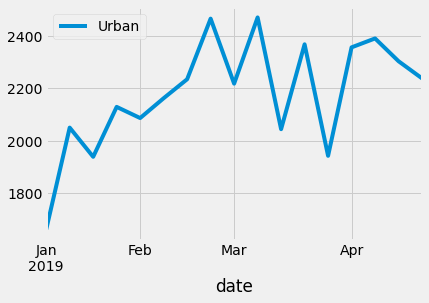

In [181]:
df_pivot_table_loc_week.plot(y="Urban")
#df_pivot_table_loc_week.plot( y="Suburban")
plt.show()

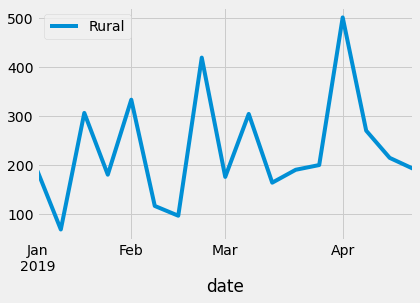

In [215]:
df_pivot_table_loc_week.plot(y="Rural")
#df_pivot_table_loc_week.plot( y="Suburban")
plt.savefig("analysis/Rural_PyBer_fare_summary.png")
plt.show()

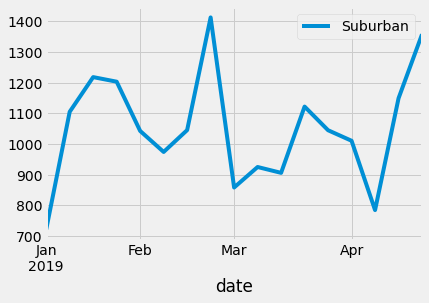

In [184]:
from matplotlib import style
style.use('fivethirtyeight')

df_pivot_table_loc_week.plot(y="Suburban")
#df_pivot_table_loc_week.plot( y="Suburban")
plt.show()

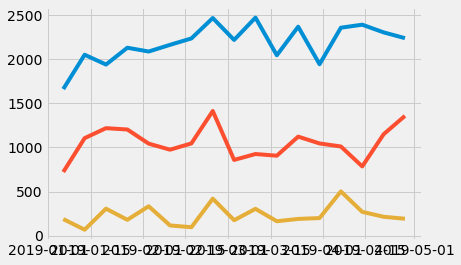

In [190]:
import matplotlib.pyplot as plt

plt.plot(df_pivot_table_loc_week["Urban"]) 
plt.plot(df_pivot_table_loc_week["Suburban"])
plt.plot(df_pivot_table_loc_week["Rural"])

plt.show()

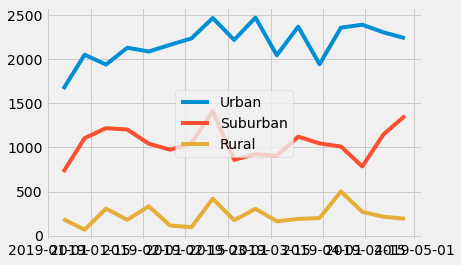

In [214]:
import matplotlib.pyplot as plt

#x_labels = ["Jan","Feb","Mar","Apr"]
plt.plot(df_pivot_table_loc_week["Urban"], label='Urban') 
plt.plot(df_pivot_table_loc_week["Suburban"], label='Suburban')
plt.plot(df_pivot_table_loc_week["Rural"], label='Rural')
#x_labels = ["Index"]
#fig, ax = plt.subplots(figsize=(10, 6))
#ax.set_xlabel("Jan","Feb","Mar")

plt.legend()
# Save the figure.
plt.savefig("analysis/PyBer_fare_summary.png")

plt.show()

In [ ]:
from matplotlib import style
style.use('fivethirtyeight')


df_pivot_table_loc_week.plot(x="date", y="type")
plt.show()

pyber_ride_df.plot(x="Month", y="Avg. Fare ($USD)")
plt.show()



x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers')
ax.set_yticks(np.arange(0, 75, step=5.0))
ax.grid()
# Save the figure.
#plt.savefig("analysis/PyBer_fare_summary.png")
plt.show()


print("Summary Statistics")
rural_drivers.describe()

x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_drivers,suburban_drivers,rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Driver Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Drivers',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0,80, step=5.0))
ax.grid()
# Save the figure.
#plt.savefig("analysis/PyBer_fare_summary.png")
plt.show()